In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate as integrate
import pandas as pd
from scipy.optimize import minimize
from scipy.special import erf
from matplotlib import cm

In [2]:
plt.style.use('default')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import time

In [3]:
def E( parameters,z):   #Flat lambdaCDM Model
    omega=parameters[0]
    omega_lambda=parameters[1]
    omega_R = 1-omega-omega_lambda
    return ((omega*((1+z)**3)) + (omega_R*((1+z)**2))+ omega_lambda)**(1/2)

In [4]:
def erf_new(x):
    return ((4/np.pi)**(1/2))*(erf(x)-erf(0))

In [5]:
def alpha(parameters,sigma_Ho,sigma,z):

    n = len(sigma)
    alpha0=1/(sigma_Ho)**2
    for i in range(n):
        alpha0 = alpha0 + (E(parameters,z[i])/sigma[i])**2
        
    return alpha0
        

In [6]:
def beta(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    n = len(sigma)
    beta0=Ho/((sigma_Ho)**2)
    for i in range(n):
        beta0 = beta0 + (E(parameters,z[i])*H_obs[i]/((sigma[i])**2))
        
    return beta0
    

In [7]:
def gamma(Ho,sigma_Ho,H_obs,sigma):
    n = len(sigma)
    gamma0=(Ho/(sigma_Ho))**2
    for i in range(n):
        gamma0 = gamma0 + (H_obs[i]/sigma[i])**2
        
    return gamma0 

In [8]:
def Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    alpha0= alpha(parameters,sigma_Ho,sigma,z)
    beta0= beta(parameters,Ho,sigma_Ho,H_obs,sigma,z)
    gamma0= gamma(Ho,sigma_Ho,H_obs,sigma)
    LH1= (1/(4*alpha0*((sigma_Ho)**2)))**(1/2)
    LH2= np.exp(-gamma0/2+(((beta0)**2)/(2*alpha0)))
    LH3 = 1+ erf_new(beta0/((2*alpha0)**(1/2)))
    return (LH1*LH2*LH3)


In [9]:
def Chi_sq(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    return (-2*np.log(Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z)))

In [10]:
Data = pd.read_csv("Data.csv")
print(Data)

        z  H(z)(kms−1Mpc−1)  std_deviation(kms−1Mpc−1)
0   0.070              69.0                       19.6
1   0.100              69.0                       12.0
2   0.120              68.6                       26.2
3   0.170              83.0                        8.0
4   0.179              75.0                        4.0
5   0.199              75.0                        5.0
6   0.200              72.9                       29.6
7   0.270              77.0                       14.0
8   0.280              88.8                       36.6
9   0.350              76.3                        5.6
10  0.352              83.0                       14.0
11  0.400              95.0                       17.0
12  0.440              82.6                        7.8
13  0.480              97.0                       62.0
14  0.593             104.0                       13.0
15  0.600              87.9                        6.1
16  0.680              92.0                        8.0
17  0.730 

In [11]:
Data = Data.to_numpy()

In [12]:
z = Data[:,0]
H_obs = Data[:,1]
sigma = Data[:,2]
print(z)

[0.07  0.1   0.12  0.17  0.179 0.199 0.2   0.27  0.28  0.35  0.352 0.4
 0.44  0.48  0.593 0.6   0.68  0.73  0.781 0.875 0.88  0.9   1.037 1.3
 1.43  1.53  1.75  2.3  ]


In [13]:
print(np.exp(-3.085))

0.04573003390021825


In [14]:
Ho= 68
sigma_Ho=2.8

In [15]:
start = time.time()
print(Chi_sq([0.30,0.91],68,2.8,H_obs,sigma,z))
end = time.time()
print(end-start)

22.234156034232086
0.0023872852325439453


In [16]:
best_fit_params = minimize (Chi_sq,x0=[0,0],args=(73.8,2.4,H_obs,sigma,z),bounds=[(0,2),(0,2)])
print(best_fit_params)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 19.100213083940886
        x: [ 3.202e-01  9.085e-01]
      nit: 9
      jac: [ 5.301e-04  7.745e-05]
     nfev: 48
     njev: 16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [17]:
best_fit_params = minimize (Chi_sq,x0=[0,0],args=(68,2.8,H_obs,sigma,z),bounds=[(0,2),(-1,1)])
print(best_fit_params)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 18.069109919989447
        x: [ 2.923e-01  7.238e-01]
      nit: 9
      jac: [-2.924e-04 -5.901e-04]
     nfev: 42
     njev: 14
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [18]:
xlist = np.linspace(0, 0.60, 1000)
ylist = np.linspace(0, 1.4, 1000)
parameters = np.meshgrid(xlist, ylist)
X=parameters[0]
Y=parameters[1]

In [19]:
Z = Chi_sq(parameters,68,2.8,H_obs,sigma,z)
Z2 =  Chi_sq(parameters,73.8,2.4,H_obs,sigma,z)

C:\Users\sriva\AppData\Local\Temp\ipykernel_24264\1583708710.py:5: RuntimeWarning: invalid value encountered in sqrt
  return ((omega*((1+z)**3)) + (omega_R*((1+z)**2))+ omega_lambda)**(1/2)


In [20]:
print(Z)

[[33.37408887 33.33210405 33.29060986 ... 96.44667258 96.54717401
  96.64768605]
 [33.36286039 33.32050125 33.27863429 ... 96.36186198 96.46239065
  96.56292997]
 [33.35196087 33.309226   33.26698484 ... 96.27704146 96.37759736
  96.47816396]
 ...
 [        nan         nan         nan ... 44.37108247 44.40288731
  44.43510864]
 [        nan         nan         nan ... 44.46290572 44.4942494
  44.52601145]
 [        nan         nan         nan ... 44.55561446 44.5864944
  44.61779461]]


C:\Users\sriva\AppData\Local\Temp\ipykernel_24264\2364664765.py:9: RuntimeWarning: divide by zero encountered in divide
  omega_lambda_nobigbang = 4 * xlist * ((np.cosh(np.arccosh((1-xlist)/xlist) / 3)) ** 3)
C:\Users\sriva\AppData\Local\Temp\ipykernel_24264\2364664765.py:9: RuntimeWarning: invalid value encountered in arccosh
  omega_lambda_nobigbang = 4 * xlist * ((np.cosh(np.arccosh((1-xlist)/xlist) / 3)) ** 3)
C:\Users\sriva\AppData\Local\Temp\ipykernel_24264\2364664765.py:9: RuntimeWarning: invalid value encountered in multiply
  omega_lambda_nobigbang = 4 * xlist * ((np.cosh(np.arccosh((1-xlist)/xlist) / 3)) ** 3)
C:\Users\sriva\AppData\Local\Temp\ipykernel_24264\2364664765.py:54: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  lines = [cb2.collections[0], cb.collections[0]]


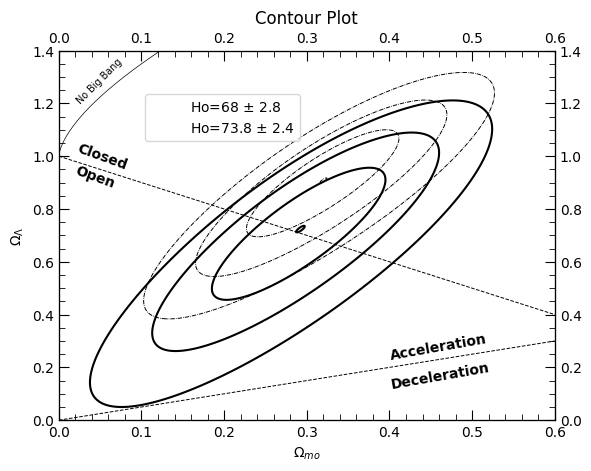

In [21]:
fig, ax1 = plt.subplots()

# Drawing contour plots
cb = ax1.contour(X, Y, Z2, levels=[19.105, 21.4, 25.27, 30.9], colors="black", linewidths=0.7, linestyles="dashdot")
cb2 = ax1.contour(X, Y, Z, levels=[18.075, 20.37, 24.24, 29.87], colors="black")

flat_lambda_CDM = ax1.plot(xlist, 1-xlist, c="black", ls="--", lw=0.7)
acceleration_line = ax1.plot(xlist, xlist/2, c="black", ls="--", lw=0.7)
omega_lambda_nobigbang = 4 * xlist * ((np.cosh(np.arccosh((1-xlist)/xlist) / 3)) ** 3)
nobigbang = ax1.plot(xlist, omega_lambda_nobigbang, c="black", lw=0.5)

# Setting up secondary axes
ax2 = ax1.twinx()
ax2.tick_params(direction='in')
ax2.set_ylim(0, 1.4)

ax3 = ax1.twiny()
ax3.tick_params(direction='in')
ax3.set_xlim(0, 0.6)

# Configuring axis locators and tick parameters
ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both', direction='in')
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax3.tick_params(which='both', direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)

ax1.set_title('Contour Plot')
ax1.set_xlabel('$\\Omega_{mo}$')
ax1.set_ylabel('$\\Omega_{\\Lambda}$')
ax1.set_ylim(0, 1.4)

# Configuring main axis locators and tick parameters
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)

# Adding text annotations
ax1.text(0.4, 0.23, "Acceleration", rotation=10, weight="bold")
ax1.text(0.4, 0.12, "Deceleration", rotation=10, weight="bold")
ax1.text(0.018, 0.88, "Open", rotation=-20, weight="bold")
ax1.text(0.02, 0.95, "Closed", rotation=-20, weight="bold")
ax1.text(0.02, 1.2, "No Big Bang", rotation=45, size="x-small")

lines = [cb2.collections[0], cb.collections[0]]
labels = ['Ho=68 $\\pm$ 2.8', 'Ho=73.8 $\\pm$ 2.4']
plt.legend(lines, labels, bbox_to_anchor=(0.5, 0.9))
plt.show()
